# Dataset
Parkinsons Data Set
https://archive.ics.uci.edu/ml/datasets/Parkinsons

Source:

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
temp_cols = df.columns.tolist()
index = df.columns.get_loc("status")
new_cols = temp_cols[0:index] + temp_cols[index+1:] + temp_cols[index:index+1]
df = df[new_cols]

In [5]:
df["status"].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64>

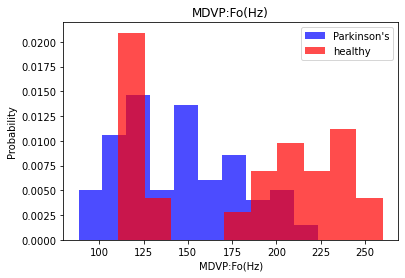

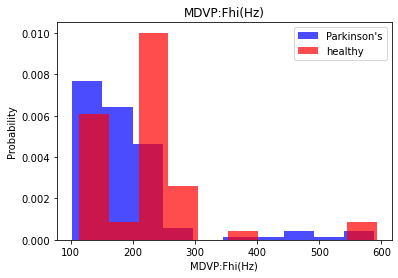

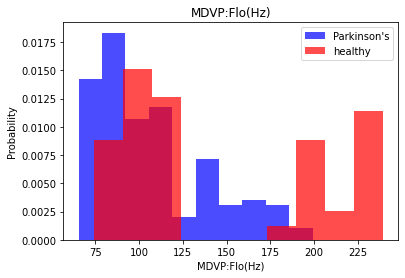

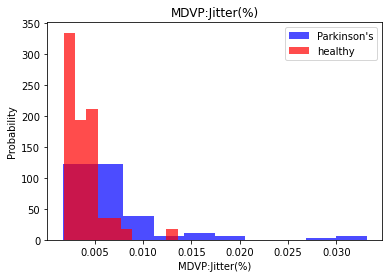

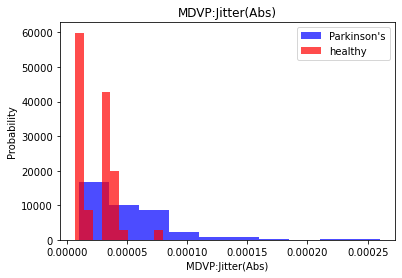

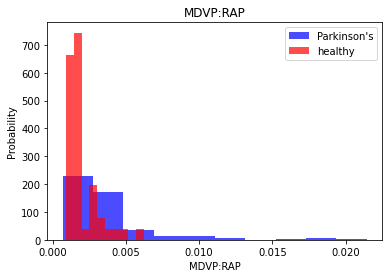

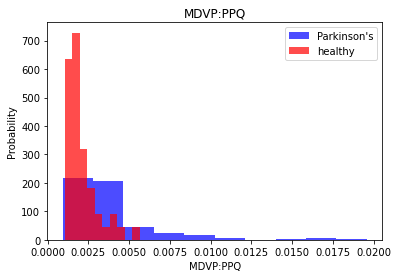

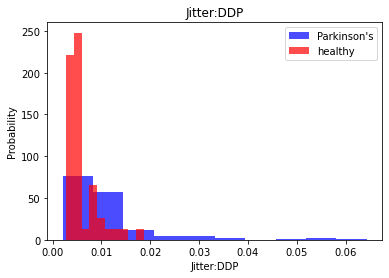

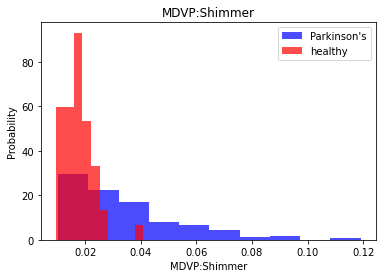

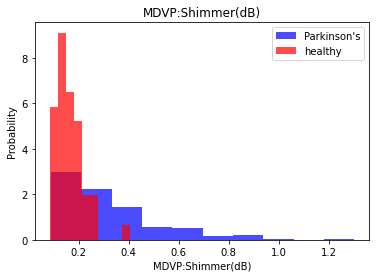

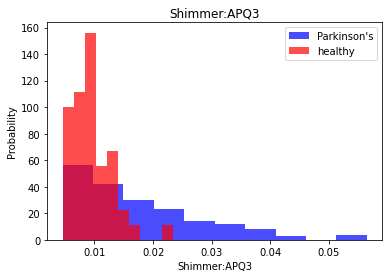

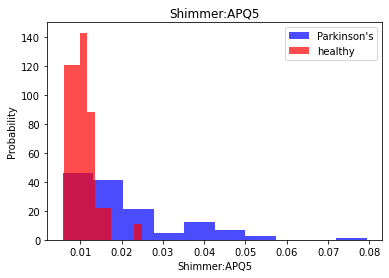

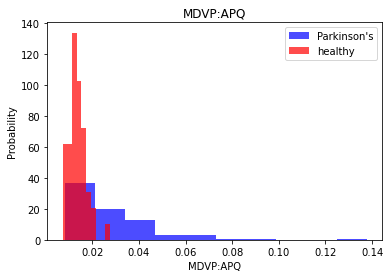

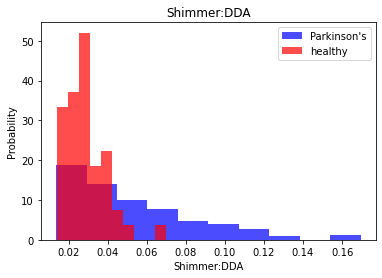

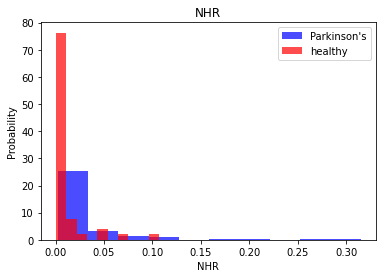

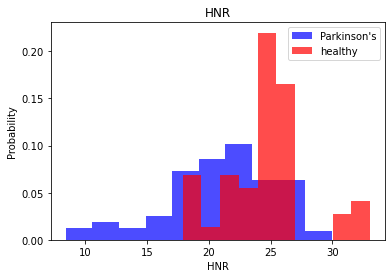

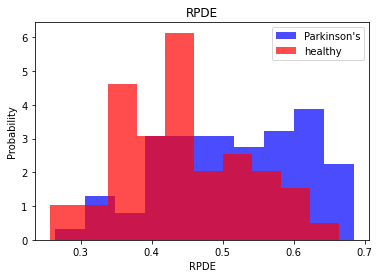

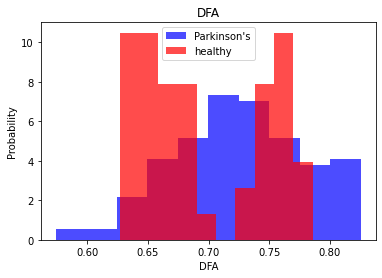

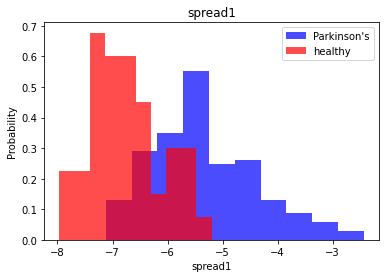

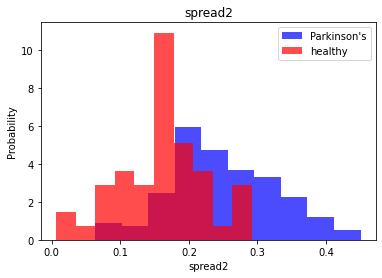

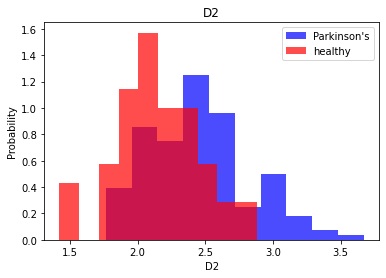

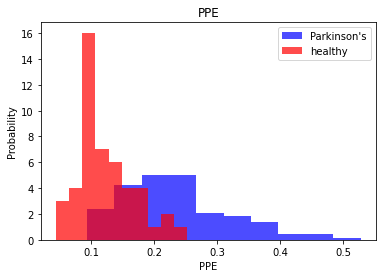

In [6]:
for label in df.columns[1:-1]:    # without 1. column which is name
    plt.hist(df[df["status"]==1][label], color='blue', label="Parkinson's", alpha=0.7, density=True)
    plt.hist(df[df["status"]==0][label], color='red', label='healthy', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(dataframe, oversample=False):
    X= dataframe[dataframe.columns[1:-1]].values
    y= dataframe[dataframe.columns[-1]].values
    
    scaler= StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
        
    data = np.hstack((X, np.reshape(y, (-1,1))))
    
    return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn_model.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [17]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.80      0.31         5
           1       0.94      0.50      0.65        34

    accuracy                           0.54        39
   macro avg       0.57      0.65      0.48        39
weighted avg       0.85      0.54      0.61        39



# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [20]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.80      0.44         5
           1       0.96      0.74      0.83        34

    accuracy                           0.74        39
   macro avg       0.63      0.77      0.64        39
weighted avg       0.88      0.74      0.78        39



# Support Vector Machines

In [21]:
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [23]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.80      0.42         5
           1       0.96      0.71      0.81        34

    accuracy                           0.72        39
   macro avg       0.62      0.75      0.62        39
weighted avg       0.87      0.72      0.76        39



# Neural Net

In [1]:
import tensorflow as tf

In [17]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [20]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(22,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


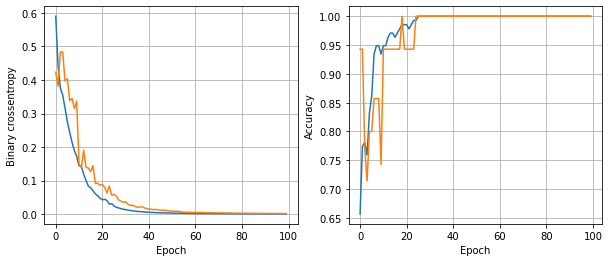

2/2 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.9744
16 nodes, dropout 0, lr 0.01, batch size 64


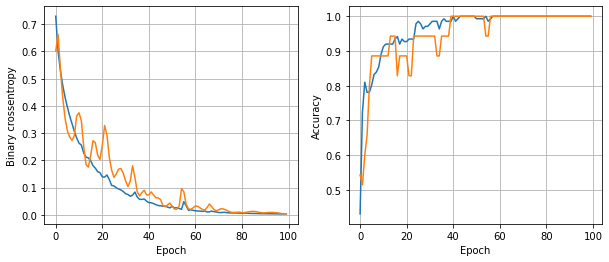

2/2 [==============================] - 0s 7ms/step - loss: 0.1341 - accuracy: 0.9487
16 nodes, dropout 0, lr 0.01, batch size 128


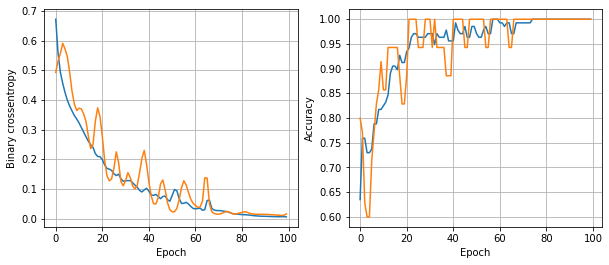

2/2 [==============================] - 0s 20ms/step - loss: 0.1152 - accuracy: 0.9487
16 nodes, dropout 0, lr 0.005, batch size 32


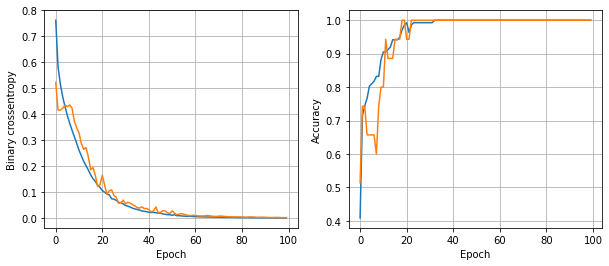

2/2 [==============================] - 0s 6ms/step - loss: 0.1744 - accuracy: 0.9231
16 nodes, dropout 0, lr 0.005, batch size 64


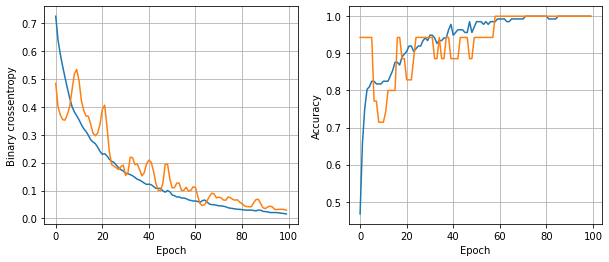

2/2 [==============================] - 0s 6ms/step - loss: 0.1664 - accuracy: 0.8718
16 nodes, dropout 0, lr 0.005, batch size 128


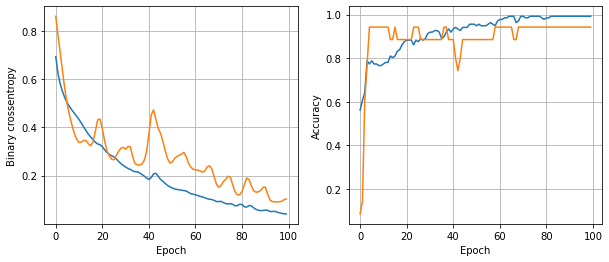

2/2 [==============================] - 0s 5ms/step - loss: 0.2950 - accuracy: 0.9231
16 nodes, dropout 0, lr 0.001, batch size 32


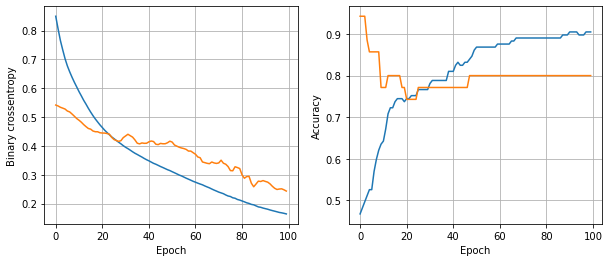

2/2 [==============================] - 0s 6ms/step - loss: 0.1684 - accuracy: 0.8974
16 nodes, dropout 0, lr 0.001, batch size 64


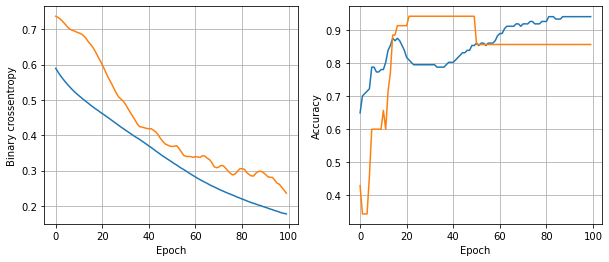

2/2 [==============================] - 0s 5ms/step - loss: 0.1681 - accuracy: 0.9744
16 nodes, dropout 0, lr 0.001, batch size 128


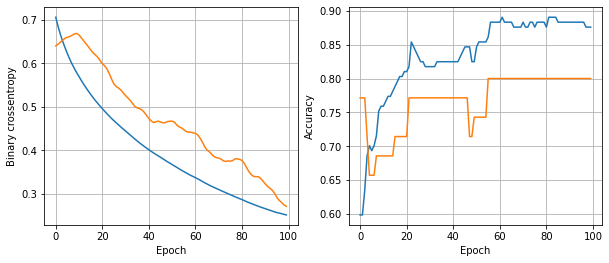

2/2 [==============================] - 0s 6ms/step - loss: 0.2465 - accuracy: 0.8718
16 nodes, dropout 0.2, lr 0.01, batch size 32


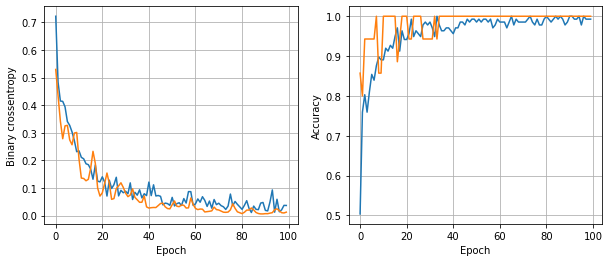

2/2 [==============================] - 0s 8ms/step - loss: 0.0638 - accuracy: 0.9487
16 nodes, dropout 0.2, lr 0.01, batch size 64


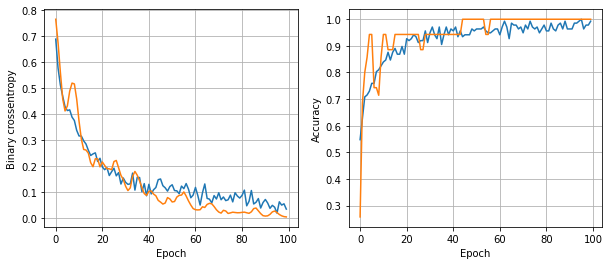

2/2 [==============================] - 0s 7ms/step - loss: 0.4067 - accuracy: 0.9487
16 nodes, dropout 0.2, lr 0.01, batch size 128


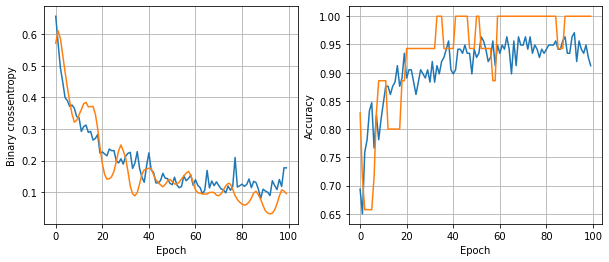

2/2 [==============================] - 0s 5ms/step - loss: 0.1679 - accuracy: 0.9487
16 nodes, dropout 0.2, lr 0.005, batch size 32


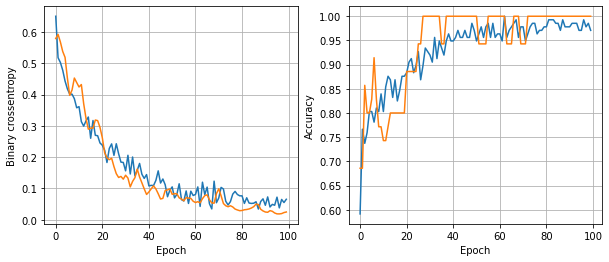

2/2 [==============================] - 0s 6ms/step - loss: 0.0874 - accuracy: 0.9744
16 nodes, dropout 0.2, lr 0.005, batch size 64


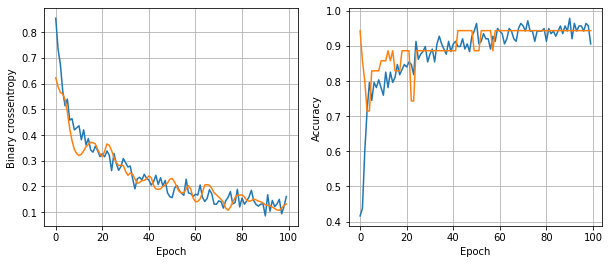

2/2 [==============================] - 0s 8ms/step - loss: 0.1326 - accuracy: 0.8974
16 nodes, dropout 0.2, lr 0.005, batch size 128


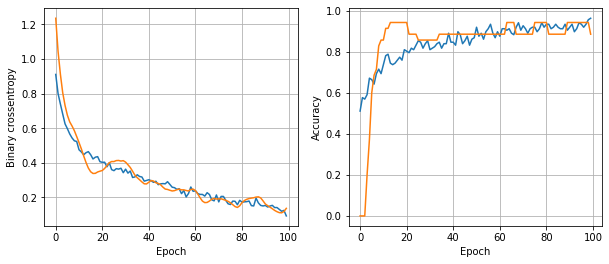

2/2 [==============================] - 0s 4ms/step - loss: 0.1110 - accuracy: 0.9744
16 nodes, dropout 0.2, lr 0.001, batch size 32


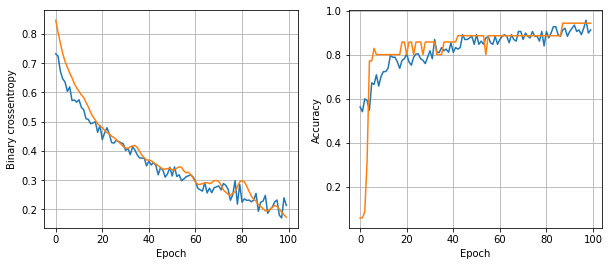

2/2 [==============================] - 0s 6ms/step - loss: 0.1798 - accuracy: 0.9487
16 nodes, dropout 0.2, lr 0.001, batch size 64


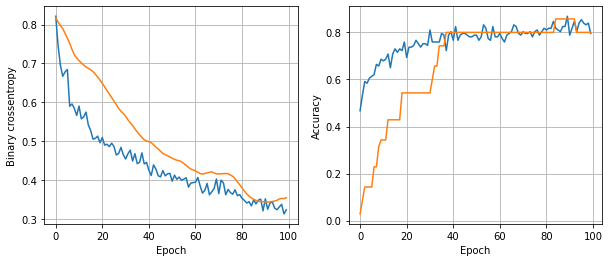

2/2 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.8462
16 nodes, dropout 0.2, lr 0.001, batch size 128


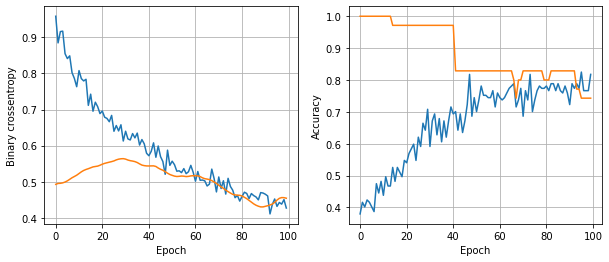

2/2 [==============================] - 0s 5ms/step - loss: 0.3558 - accuracy: 0.8718
32 nodes, dropout 0, lr 0.01, batch size 32


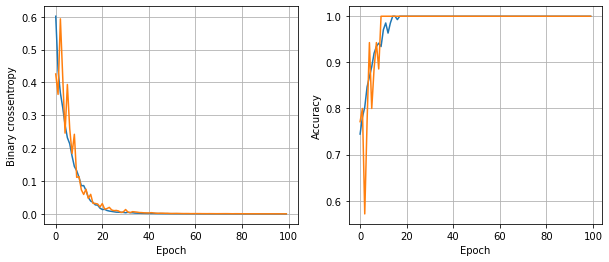

2/2 [==============================] - 0s 7ms/step - loss: 0.1797 - accuracy: 0.9487
32 nodes, dropout 0, lr 0.01, batch size 64


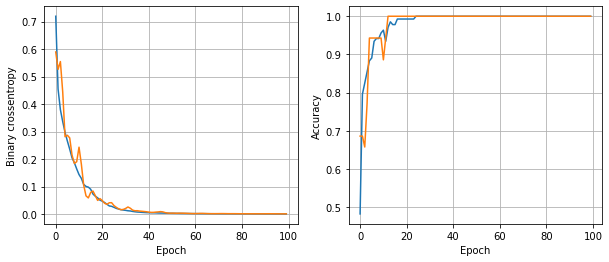

2/2 [==============================] - 0s 5ms/step - loss: 0.3497 - accuracy: 0.9487
32 nodes, dropout 0, lr 0.01, batch size 128


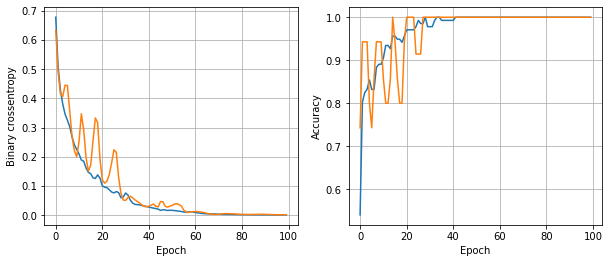

2/2 [==============================] - 0s 4ms/step - loss: 0.3698 - accuracy: 0.9231
32 nodes, dropout 0, lr 0.005, batch size 32


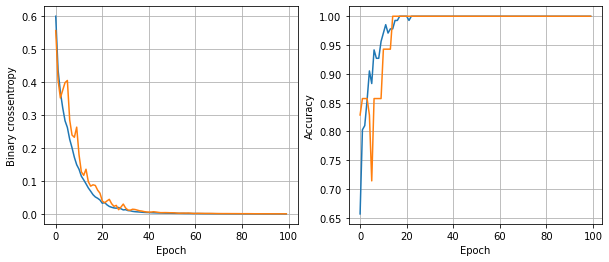

2/2 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9487
32 nodes, dropout 0, lr 0.005, batch size 64


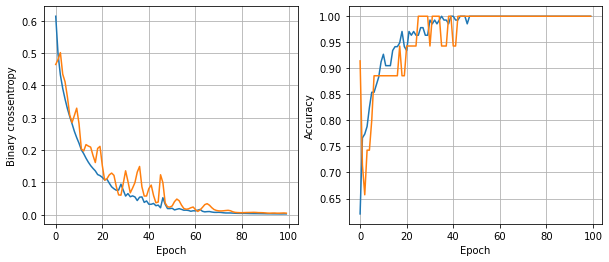

2/2 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9744
32 nodes, dropout 0, lr 0.005, batch size 128


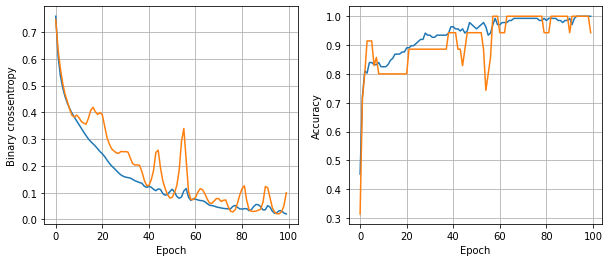

2/2 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9487
32 nodes, dropout 0, lr 0.001, batch size 32


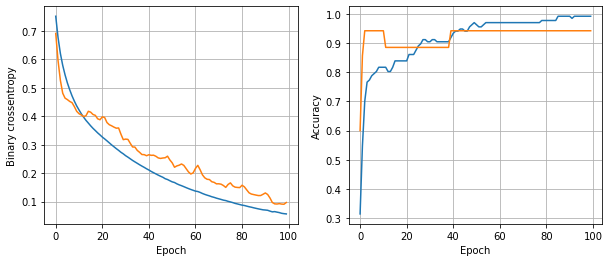

2/2 [==============================] - 0s 5ms/step - loss: 0.0790 - accuracy: 0.9487
32 nodes, dropout 0, lr 0.001, batch size 64


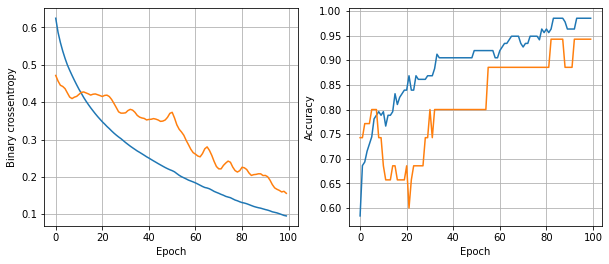

2/2 [==============================] - 0s 5ms/step - loss: 0.1026 - accuracy: 0.9744
32 nodes, dropout 0, lr 0.001, batch size 128


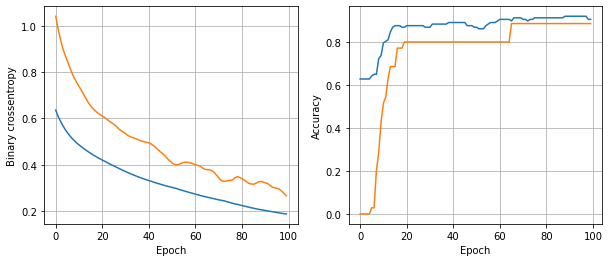

2/2 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.01, batch size 32


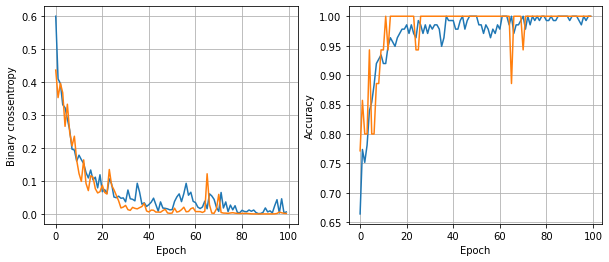

2/2 [==============================] - 0s 4ms/step - loss: 0.2255 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.01, batch size 64


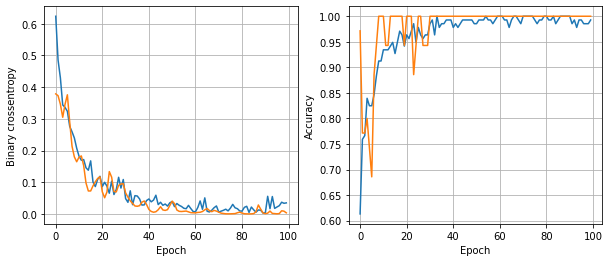

2/2 [==============================] - 0s 7ms/step - loss: 0.1984 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.01, batch size 128


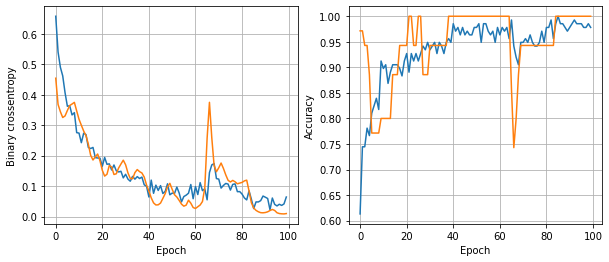

2/2 [==============================] - 0s 5ms/step - loss: 0.1218 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.005, batch size 32


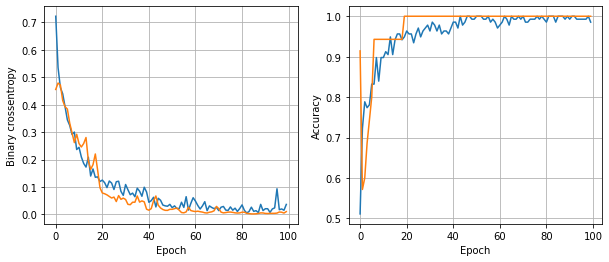

2/2 [==============================] - 0s 5ms/step - loss: 0.2296 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.005, batch size 64


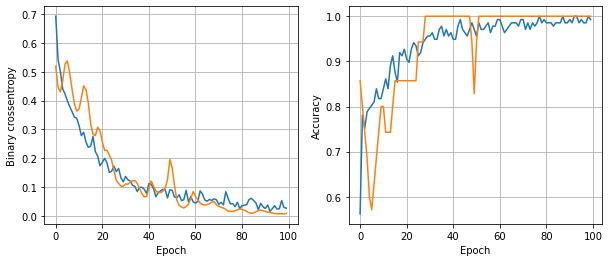

2/2 [==============================] - 0s 8ms/step - loss: 0.1664 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.005, batch size 128


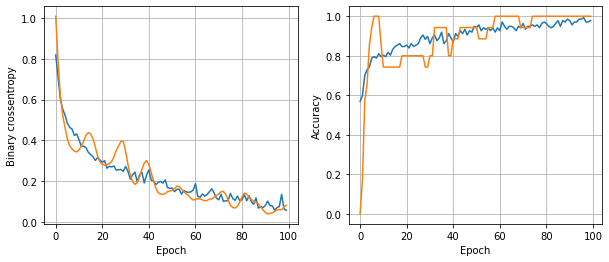

2/2 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.9744
32 nodes, dropout 0.2, lr 0.001, batch size 32


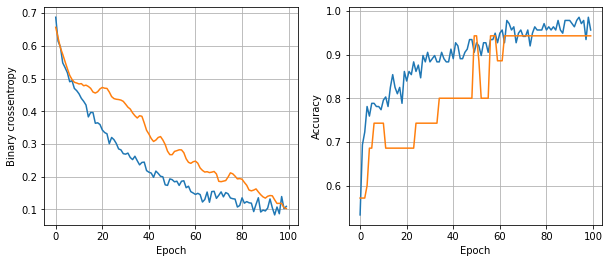

2/2 [==============================] - 0s 5ms/step - loss: 0.0900 - accuracy: 0.9487
32 nodes, dropout 0.2, lr 0.001, batch size 64


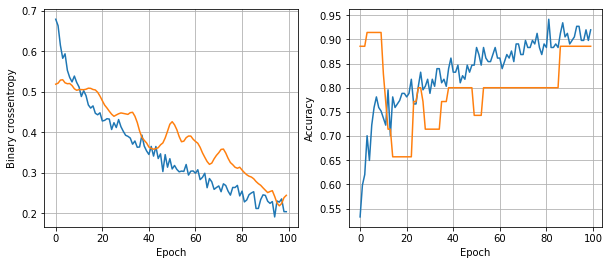

2/2 [==============================] - 0s 5ms/step - loss: 0.1793 - accuracy: 0.8974
32 nodes, dropout 0.2, lr 0.001, batch size 128


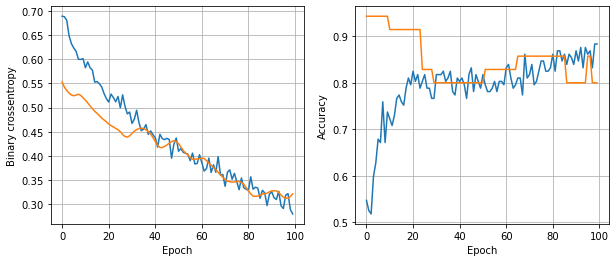

2/2 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.8718
64 nodes, dropout 0, lr 0.01, batch size 32


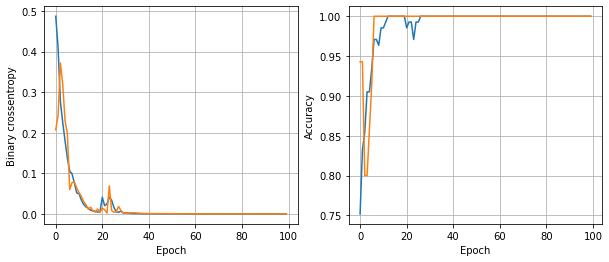

2/2 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.9231
64 nodes, dropout 0, lr 0.01, batch size 64


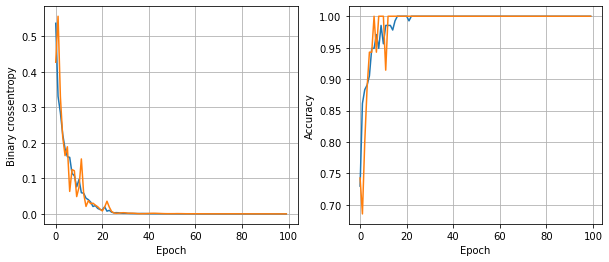

2/2 [==============================] - 0s 5ms/step - loss: 0.4461 - accuracy: 0.9487
64 nodes, dropout 0, lr 0.01, batch size 128


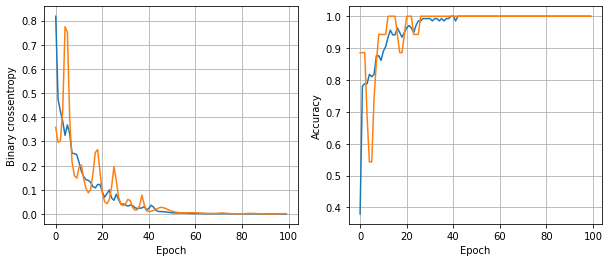

2/2 [==============================] - 0s 5ms/step - loss: 0.1981 - accuracy: 0.9744
64 nodes, dropout 0, lr 0.005, batch size 32


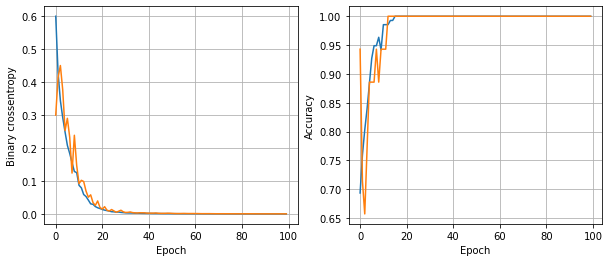

2/2 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.9744
64 nodes, dropout 0, lr 0.005, batch size 64


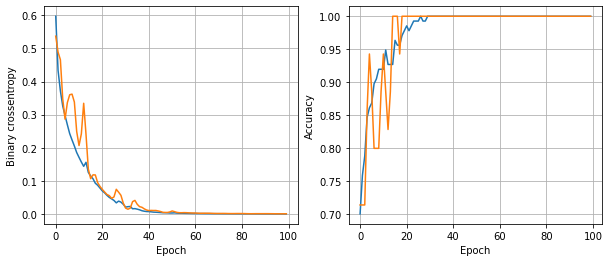

2/2 [==============================] - 0s 7ms/step - loss: 0.1664 - accuracy: 0.9744
64 nodes, dropout 0, lr 0.005, batch size 128


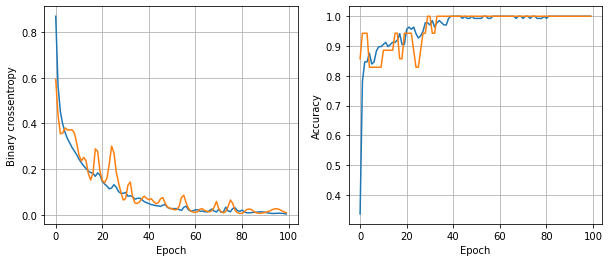

2/2 [==============================] - 0s 6ms/step - loss: 0.1496 - accuracy: 0.9487
64 nodes, dropout 0, lr 0.001, batch size 32


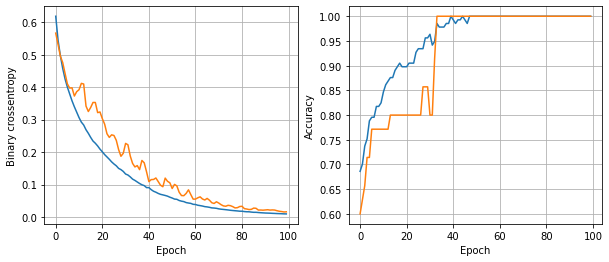

2/2 [==============================] - 0s 5ms/step - loss: 0.1279 - accuracy: 0.9744
64 nodes, dropout 0, lr 0.001, batch size 64


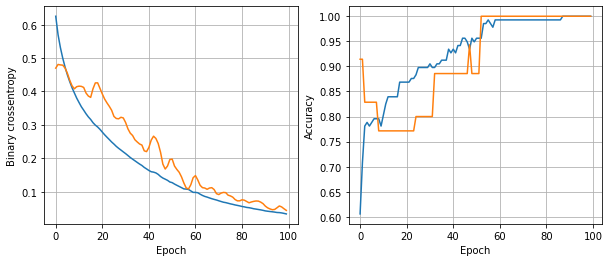

2/2 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9487
64 nodes, dropout 0, lr 0.001, batch size 128


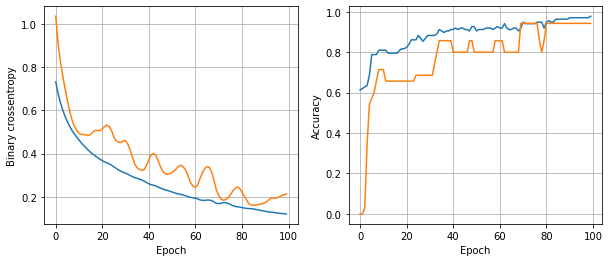

2/2 [==============================] - 0s 5ms/step - loss: 0.1389 - accuracy: 0.9487
64 nodes, dropout 0.2, lr 0.01, batch size 32


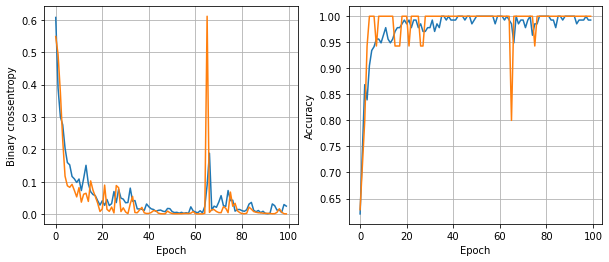

2/2 [==============================] - 0s 7ms/step - loss: 0.1790 - accuracy: 0.9487
64 nodes, dropout 0.2, lr 0.01, batch size 64


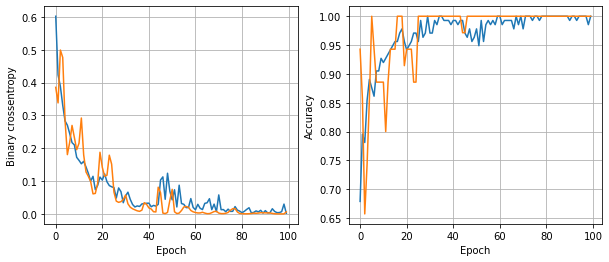

2/2 [==============================] - 0s 6ms/step - loss: 0.4528 - accuracy: 0.9231
64 nodes, dropout 0.2, lr 0.01, batch size 128


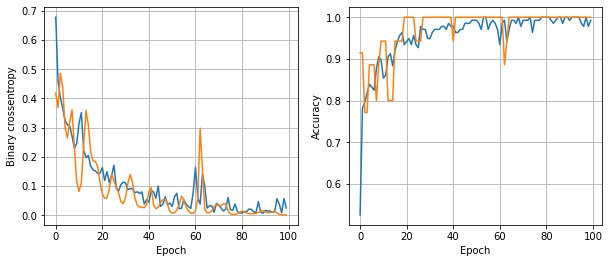

2/2 [==============================] - 0s 5ms/step - loss: 0.2105 - accuracy: 0.9487
64 nodes, dropout 0.2, lr 0.005, batch size 32


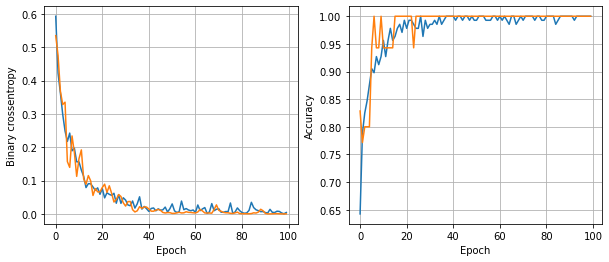

2/2 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.9231
64 nodes, dropout 0.2, lr 0.005, batch size 64


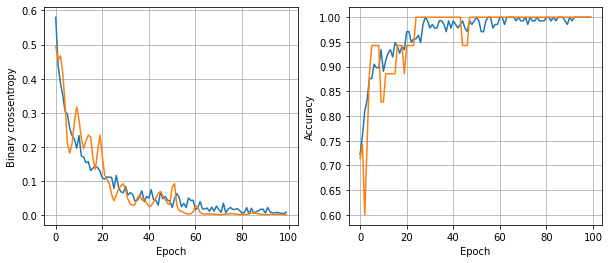

2/2 [==============================] - 0s 7ms/step - loss: 0.1631 - accuracy: 0.9487
64 nodes, dropout 0.2, lr 0.005, batch size 128


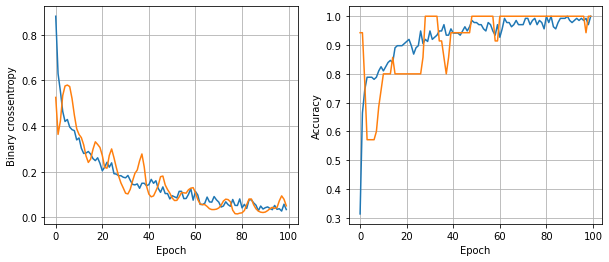

2/2 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9487
64 nodes, dropout 0.2, lr 0.001, batch size 32


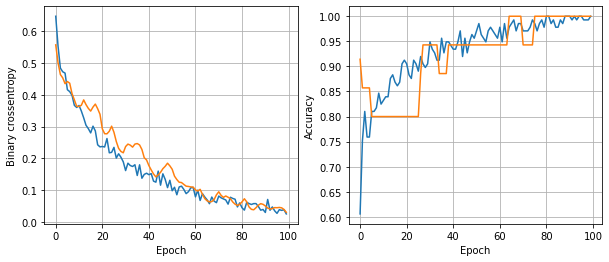

2/2 [==============================] - 0s 5ms/step - loss: 0.1071 - accuracy: 0.9744
64 nodes, dropout 0.2, lr 0.001, batch size 64


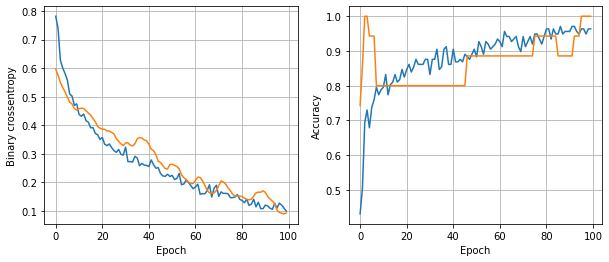

2/2 [==============================] - 0s 5ms/step - loss: 0.1841 - accuracy: 0.8974
64 nodes, dropout 0.2, lr 0.001, batch size 128


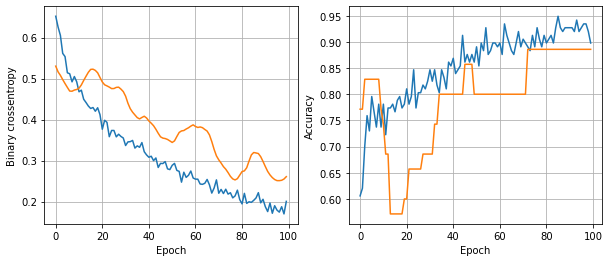

2/2 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.9231


In [21]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in[0,0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss <least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [38]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

2/2 [==============================] - 0s 0s/step


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.87      0.84      0.86        32

    accuracy                           0.77        39
   macro avg       0.62      0.64      0.63        39
weighted avg       0.78      0.77      0.78        39

